In [11]:
import librosa
from matplotlib import pyplot as plt
from math import ceil
import numpy as np

In [12]:
src_path = "F:\\projects\\pythonProjects\\pythonProject9\\test1\\test.wav"

In [13]:
wave, sr = librosa.load(src_path)

In [14]:
print(len(wave))

205565


In [15]:
def calc_amplitude_envelop(wave, hop_size, frame_length):
    if (len(wave) - frame_length) % hop_size != 0 :
        frame_num =  ceil((len(wave) - frame_length) / hop_size + 1)
        pad_num = (frame_num - 1) * hop_size + frame_length - len(wave)
        wave = np.pad(wave, (0, pad_num), 'constant', constant_values=0)
    frame_num = ceil((len(wave) - frame_length) / hop_size + 1)
    wave_split = []
    for fn in range(frame_num):
        frame = wave[fn * hop_size: fn * hop_size + frame_length]
        frame_max = max(frame)
        wave_split.append(frame_max)
    return np.array(wave_split)       

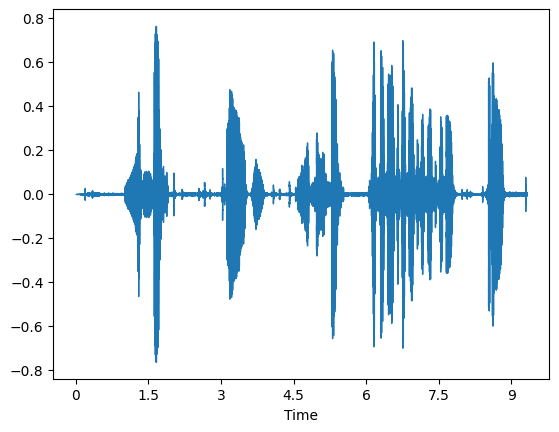

In [20]:
frame_size = 512
hop_size = int(frame_size/2)
wave_amplitudes = calc_amplitude_envelop(wave, hop_size, frame_size)
frame_scale = np.arange(0, len(wave_amplitudes))
time_scale = librosa.frames_to_time(frame_scale, hop_length=hop_size,sr=sr)

librosa.display.waveshow(wave)


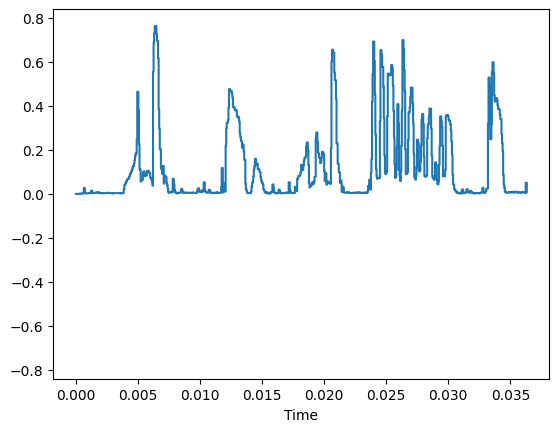

In [21]:
librosa.display.waveshow(wave_amplitudes)

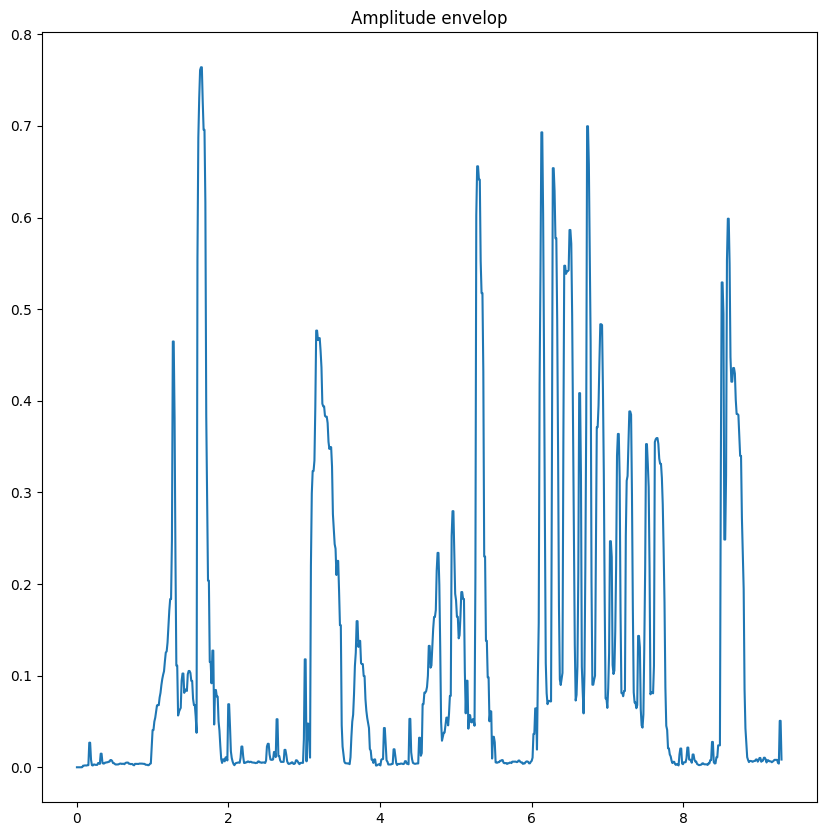

In [22]:
plt.figure(figsize = (10,10))
plt.plot(time_scale, wave_amplitudes)
plt.title("Amplitude envelop")
plt.show()